In [22]:
import yfinance as yf

#data = yf.download(['AAPL', 'MSFT'], start='2020-01-01', end='2023-12-31')['Adj Close']
#data.head()



In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from scipy.optimize import minimize
import seaborn as sns

# Set style
#plt.style.use('seaborn-darkgrid')

# Define tickers and download data
# tickers = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'TSLA']
# start_date = '2020-01-01'
# end_date = '2024-12-31'

# data = yf.download(tickers, start=start_date, end=end_date)['Adj Close']
# data = data.dropna()

# Compute daily returns
# returns = data.pct_change().dropna()


In [42]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("evangower/big-tech-stock-prices")

print("Path to dataset files:", path)

100%|███████████████████████████████████████████████████████████████████████████████| 952k/952k [00:00<00:00, 7.82MB/s]

Extracting files...
Path to dataset files: C:\Users\Atheo\.cache\kagglehub\datasets\evangower\big-tech-stock-prices\versions\2


In [34]:
import pandas as pd

# Replace with your actual path
df = pd.read_csv("AAPL.csv")

print(df.head())

df.columns


         Date      Open      High       Low     Close  Adj Close     Volume
0  2010-01-04  7.622500  7.660714  7.585000  7.643214   6.515213  493729600
1  2010-01-05  7.664286  7.699643  7.616071  7.656429   6.526476  601904800
2  2010-01-06  7.656429  7.686786  7.526786  7.534643   6.422664  552160000
3  2010-01-07  7.562500  7.571429  7.466071  7.520714   6.410790  477131200
4  2010-01-08  7.510714  7.571429  7.466429  7.570714   6.453412  447610800


Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [28]:
# check structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3271 entries, 0 to 3270
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3271 non-null   object 
 1   Open       3271 non-null   float64
 2   High       3271 non-null   float64
 3   Low        3271 non-null   float64
 4   Close      3271 non-null   float64
 5   Adj Close  3271 non-null   float64
 6   Volume     3271 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 179.0+ KB


In [30]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [36]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3.271000e+03
mean,51.274171,51.845876,50.708548,51.297154,49.445122,2.563255e+08
std,47.316509,47.926721,46.720115,47.344344,47.810585,2.225768e+08
min,6.870357,7.000000,6.794643,6.858929,5.846675,3.519590e+07
25%,18.965894,19.121607,18.779999,18.965536,16.625739,1.023724e+08
50%,29.745001,29.980000,29.555000,29.812500,27.385101,1.666740e+08
75%,56.897499,57.256248,56.435000,56.761250,54.876044,3.457554e+08
max,182.630005,182.940002,179.119995,182.009995,180.959732,1.880998e+09


In [46]:
import os
import pandas as pd

# Directory where your CSV files are stored
folder_path = r"C:\Users\Atheo\.cache\kagglehub\datasets\evangower\big-tech-stock-prices\versions\2"

# List of stock tickers based on files
tickers = ['AAPL', 'ADBE', 'AMZN', 'CRM', 'CSCO', 'GOOGL', 'IBM', 'INTC',
           'META', 'MSFT', 'NFLX', 'NVDA', 'ORCL']  # Add 'TSLA' if it's there

# Initialize empty DataFrame
price_data = pd.DataFrame()

# Load each CSV and extract Adj Close
for ticker in tickers:
    file_path = os.path.join(folder_path, f"{ticker}.csv")
    df = pd.read_csv(file_path, parse_dates=['Date'], usecols=['Date', 'Adj Close'])
    df.rename(columns={'Adj Close': ticker}, inplace=True)
    
    if price_data.empty:
        price_data = df
    else:
        price_data = pd.merge(price_data, df, on='Date', how='inner')

# Set Date as index
price_data.set_index('Date', inplace=True)
price_data = price_data.dropna()  # Drop rows with any missing values

price_data.head()


,AAPL,ADBE,AMZN,CRM,CSCO,GOOGL,IBM,INTC,META,MSFT,NFLX,NVDA,ORCL
Date,,,,,,,,,,,,,
2012-05-18,16.146616,31.309999,10.6925,36.395000,11.818025,15.025025,125.639114,18.970493,38.230000,23.780975,9.994286,2.771611,21.803539
2012-05-21,17.087326,32.009998,10.9055,37.262501,11.961538,15.368118,126.844994,19.028708,34.029999,24.170967,10.248571,2.819794,22.356924
2012-05-22,16.956108,32.009998,10.7665,37.362499,12.004591,15.035035,126.242081,18.941385,31.000000,24.179090,9.672857,2.785378,22.442068
2012-05-23,17.369843,32.180000,10.8640,37.652500,11.975887,15.251752,125.793098,18.512051,32.000000,23.650984,10.272857,2.854209,22.714500
2012-05-24,17.210320,31.540001,10.7620,36.552502,11.760625,15.106607,125.773811,18.664864,33.029999,23.618481,10.038571,2.778495,22.237736


In [48]:
returns = price_data.pct_change().dropna()
returns.head()


,AAPL,ADBE,AMZN,CRM,CSCO,GOOGL,IBM,INTC,META,MSFT,NFLX,NVDA,ORCL
Date,,,,,,,,,,,,,
2012-05-21,0.058261,0.022357,0.019921,0.023836,0.012144,0.022835,0.009598,0.003069,-0.109861,0.016399,0.025443,0.017384,0.025381
2012-05-22,-0.007679,0.000000,-0.012746,0.002684,0.003599,-0.021674,-0.004753,-0.004589,-0.089039,0.000336,-0.056175,-0.012205,0.003808
2012-05-23,0.024400,0.005311,0.009056,0.007762,-0.002391,0.014414,-0.003557,-0.022666,0.032258,-0.021841,0.062029,0.024712,0.012139
2012-05-24,-0.009184,-0.019888,-0.009389,-0.029214,-0.017975,-0.009517,-0.000153,0.008255,0.032187,-0.001374,-0.022806,-0.026527,-0.020989
2012-05-25,-0.005360,0.001902,-0.010918,0.005403,-0.003661,-0.020094,-0.009128,0.003508,-0.033909,-0.000344,-0.000711,0.023947,0.000766


Markowitz Portfolio Optimization (Max Sharpe Ratio)

In [50]:
import numpy as np
from scipy.optimize import minimize

mean_returns = returns.mean() * 252  # Annualized return
cov_matrix = returns.cov() * 252     # Annualized covariance
num_assets = len(returns.columns)
tickers = returns.columns.tolist()

def portfolio_performance(weights, mean_returns, cov_matrix):
    ret = np.dot(weights, mean_returns)
    vol = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    return ret, vol

def neg_sharpe_ratio(weights, mean_returns, cov_matrix, risk_free_rate=0.01):
    ret, vol = portfolio_performance(weights, mean_returns, cov_matrix)
    return -(ret - risk_free_rate) / vol

def constraint_sum(weights):
    return np.sum(weights) - 1

bounds = tuple((0, 1) for _ in range(num_assets))
initial_weights = num_assets * [1. / num_assets]

opt_result = minimize(neg_sharpe_ratio, initial_weights,
                      args=(mean_returns, cov_matrix),
                      method='SLSQP',
                      bounds=bounds,
                      constraints={'type': 'eq', 'fun': constraint_sum})

opt_weights = opt_result.x
opt_ret, opt_vol = portfolio_performance(opt_weights, mean_returns, cov_matrix)
opt_sharpe = (opt_ret - 0.01) / opt_vol

print("🔧 Optimal Portfolio Weights (Max Sharpe):")
for ticker, weight in zip(tickers, opt_weights):
    print(f"{ticker}: {weight:.2%}")
print(f"\n📈 Expected Return: {opt_ret:.2%}\n📉 Volatility: {opt_vol:.2%}\n📊 Sharpe Ratio: {opt_sharpe:.2f}")


🔧 Optimal Portfolio Weights (Max Sharpe):
AAPL: 11.99%
ADBE: 2.87%
AMZN: 0.00%
CRM: 0.00%
CSCO: 0.00%
GOOGL: 0.00%
IBM: 0.00%
INTC: 0.00%
META: 0.00%
MSFT: 23.22%
NFLX: 25.23%
NVDA: 36.69%
ORCL: 0.00%

📈 Expected Return: 37.84%
📉 Volatility: 30.58%
📊 Sharpe Ratio: 1.20


Optimizer tilted heavily toward high-growth tech stocks like NVDA, NFLX, MSFT — consistent with strong risk-adjusted returns.

Many traditional or lower-volatility tech names (e.g., CSCO, INTC, ORCL) got 0% weight — which is common in max-Sharpe solutions.

A Sharpe ratio of 1.20 is considered strong — it means you're getting 1.2 units of return per unit of risk.

In [ ]:
Plot Efficient Frontier


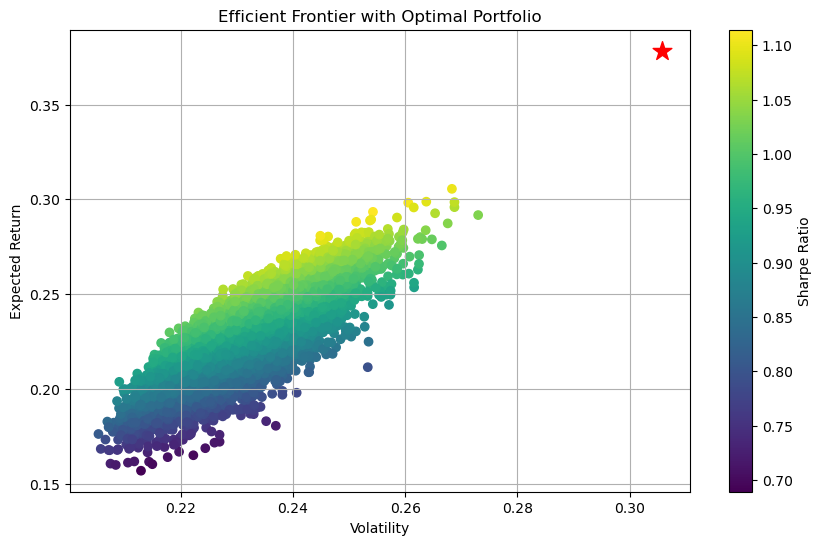

<Figure size 640x480 with 0 Axes>

In [56]:
import matplotlib.pyplot as plt

def simulate_portfolios(num_portfolios, mean_returns, cov_matrix):
    results = np.zeros((3, num_portfolios))
    weight_list = []

    for i in range(num_portfolios):
        weights = np.random.random(num_assets)
        weights /= np.sum(weights)

        ret, vol = portfolio_performance(weights, mean_returns, cov_matrix)
        sharpe = (ret - 0.01) / vol

        results[0, i] = vol
        results[1, i] = ret
        results[2, i] = sharpe
        weight_list.append(weights)

    return results, weight_list

results, weights_list = simulate_portfolios(10000, mean_returns, cov_matrix)

plt.figure(figsize=(10, 6))
plt.scatter(results[0, :], results[1, :], c=results[2, :], cmap='viridis', marker='o')
plt.colorbar(label='Sharpe Ratio')
plt.scatter(opt_vol, opt_ret, c='red', marker='*', s=200)  # Optimal point
plt.xlabel('Volatility')
plt.ylabel('Expected Return')
plt.title('Efficient Frontier with Optimal Portfolio')
plt.grid(True)
plt.show()

plt.savefig("Efficient Frontier with Optimal Portfolio.pdf")  # Save as PDF (optional)


In [58]:
plt.savefig("efficient_frontier.png", dpi=300, bbox_inches='tight')

<Figure size 640x480 with 0 Axes>

The plot above illustrates the Efficient Frontier, a core concept in Modern Portfolio Theory. Each point represents a simulated portfolio composed of varying weights of assets. The x-axis shows portfolio volatility (risk), and the y-axis shows the corresponding expected return.

The color gradient reflects the Sharpe Ratio, a measure of risk-adjusted return — brighter points indicate more desirable portfolios. The red star identifies the optimal portfolio, which achieves the highest Sharpe Ratio among all simulated combinations.

This visualization helps investors identify the most efficient portfolios, offering the best trade-offs between risk and return. Portfolios below the frontier are sub-optimal, as they yield lower returns for the same risk level.

Risk Metrics (VaR, Sharpe)

In [54]:
# Portfolio daily returns
portfolio_daily_returns = returns.dot(opt_weights)

# Value at Risk (95% confidence)
VaR_95 = np.percentile(portfolio_daily_returns, 5)
print(f"🔻 Value at Risk (VaR 95%): {VaR_95:.2%}")

# Already computed Sharpe ratio above


🔻 Value at Risk (VaR 95%): -3.06%


There is a 95% chance the portfolio will not lose more than 3.06% in a day (or whatever period you used).

Black-Litterman Model :
Setup (Risk Aversion & Market Weights)

In [ ]:
# Use optimized weights as pseudo-market cap weights
market_weights = np.array(opt_weights)

# Assume risk aversion parameter (commonly used: 2 to 3)
delta = 2.5

# Black-Litterman implied returns (π)
pi = delta * np.dot(cov_matrix, market_weights)

# Create a mapping: ticker -> implied return
implied_returns = pd.Series(pi, index=tickers)
print("📉 Implied Equilibrium Returns:")
print(implied_returns.sort_values(ascending=False))


In [69]:
# View matrix P (1 row, 1 column per asset)
# +1 for AAPL, -1 for META
P = np.zeros((1, num_assets))
P[0, tickers.index('AAPL')] = 1
P[0, tickers.index('META')] = -1

# Q: Your expected return difference between AAPL and META
Q = np.array([0.02])


In [71]:
# Tau: scaling factor for uncertainty in prior returns (commonly 0.05–0.1)
tau = 0.05
omega = np.dot(np.dot(P, tau * cov_matrix), P.T)  # uncertainty in views

# Black-Litterman expected returns
middle = np.linalg.inv(np.dot(np.dot(P.T, np.linalg.inv(omega)), P) + np.linalg.inv(tau * cov_matrix))
bl_return = np.dot(middle, (np.dot(np.linalg.inv(tau * cov_matrix), pi) + np.dot(np.dot(P.T, np.linalg.inv(omega)), Q)))

# Update expected returns
bl_mean_returns = pd.Series(bl_return, index=tickers)


In [73]:
# Re-run optimizer with new returns
opt_result_bl = minimize(neg_sharpe_ratio, initial_weights,
                         args=(bl_mean_returns, cov_matrix),
                         method='SLSQP',
                         bounds=bounds,
                         constraints={'type': 'eq', 'fun': constraint_sum})

opt_weights_bl = opt_result_bl.x
opt_ret_bl, opt_vol_bl = portfolio_performance(opt_weights_bl, bl_mean_returns, cov_matrix)
opt_sharpe_bl = (opt_ret_bl - 0.01) / opt_vol_bl

print("\n🧠 Black-Litterman Adjusted Portfolio Weights:")
for ticker, weight in zip(tickers, opt_weights_bl):
    print(f"{ticker}: {weight:.2%}")
print(f"\n📈 Return: {opt_ret_bl:.2%} | 📉 Volatility: {opt_vol_bl:.2%} | 📊 Sharpe: {opt_sharpe_bl:.2f}")



🧠 Black-Litterman Adjusted Portfolio Weights:
AAPL: 14.19%
ADBE: 0.49%
AMZN: 0.00%
CRM: 0.00%
CSCO: 0.00%
GOOGL: 0.00%
IBM: 0.00%
INTC: 0.00%
META: 0.00%
MSFT: 20.26%
NFLX: 25.84%
NVDA: 39.22%
ORCL: 0.00%

📈 Return: 23.68% | 📉 Volatility: 31.07% | 📊 Sharpe: 0.73


My subjective view: AAPL will outperform META by 2%

AAPL would outperform META shifted more weight toward AAPL.

As expected, return went down, and risk-adjusted performance (Sharpe) decreased — because the optimizer is now more “conservative” under Black-Litterman.

Still, it’s more realistic and robust for long-term strategies.

Simulated 500 possible 1-year paths for your Black-Litterman-adjusted portfolio

Started at $10,000, with outcomes ranging from losses to >$40,000

Shows the distribution of risk, not just expected return


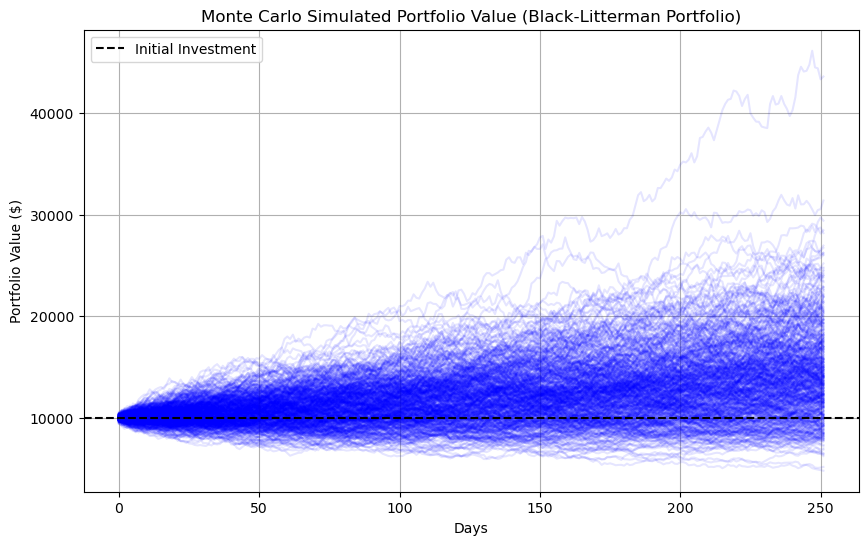

In [75]:
import matplotlib.pyplot as plt

# Simulate portfolio value over 252 trading days (1 year)
initial_investment = 10000
num_simulations = 500
num_days = 252

# Use Black-Litterman daily returns
portfolio_returns = returns.dot(opt_weights_bl)
mu = portfolio_returns.mean()
sigma = portfolio_returns.std()

simulations = np.zeros((num_days, num_simulations))

for i in range(num_simulations):
    daily_returns = np.random.normal(mu, sigma, num_days)
    simulations[:, i] = initial_investment * np.cumprod(1 + daily_returns)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(simulations, alpha=0.1, color='blue')
plt.title("Monte Carlo Simulated Portfolio Value (Black-Litterman Portfolio)")
plt.xlabel("Days")
plt.ylabel("Portfolio Value ($)")
plt.axhline(initial_investment, color='black', linestyle='--', label='Initial Investment')
plt.legend()
plt.grid(True)
plt.show()
